# Problema
_(Fonte: Linear Algebra and Its Applications. Addison-Wesley Longman, 1997)_

Suponha que um conjunto de dados experimentais seja representado por um conjunto de pontos do plano.
Um polinômio interpolador para esse conjunto de dados é um polinômio cujo gráfico passa por cada ponto.
Em trabalhos científicos, esse polinômio pode ser usado, por exemplo, para obter estimativas de valores
entre pontos conhecidos.

Em uma experiência num túnel de vento, a força sobre um projétil devido à resistência do ar foi medida
para velocidades diferentes:

| Velocidade | Força |
| -- | --  | 
| 0 | 0 |
| 2 | 2.9 |
| 4 | 14.8 |
| 6 | 39.6 |
| 8 | 74.3 |
| 10 | 119 | 

1. Determine um polinômio interpolador para esse conjunto de dados e obtenha uma estimativa para a força
sobre o projétil quando ele está se deslocando a uma velocidade de 228,6 m/s. Use $p(t) = a_0 + a_1t + a_2t^2 + a_3t^3 + a_4t^4 + a_5t^5 $

2. O que acontece se tentarmos obter a resposta empregando um polinômio cúbico, por exemplo.

# Solução

In [2]:
import numpy as np   

x = np.array([0, 2, 4, 6, 8, 10])
y = np.array([0, 2.9, 14.8, 39.6, 74.3, 119])

In [3]:
def expandir_x(x):
    X = np.array([ x for i in range(len(x))]).T
    for i in range(X.shape[1]):
        X[:,i] = X[:,i]**(X.shape[1]-i-1)
    return X

X = expandir_x(x)
X

array([[     0,      0,      0,      0,      0,      1],
       [    32,     16,      8,      4,      2,      1],
       [  1024,    256,     64,     16,      4,      1],
       [  7776,   1296,    216,     36,      6,      1],
       [ 32768,   4096,    512,     64,      8,      1],
       [100000,  10000,   1000,    100,     10,      1]])

In [9]:
import math
import numpy as np
import array_to_latex as altx

def proj(u,v):
    return (np.dot(u, v) / np.dot(u, u)) * u

def QR_decomp(A):
    u = []
    for i in range(A.shape[1]):
        u.append(
            A[:,i] - np.sum([ proj(u[j], A[:, i]) for j in range(i) ], axis=0 )
        )

    Q = np.array([u[i]/math.sqrt(np.dot(u[i],u[i])) for i in range(len(u))]).T

    R = []
    for i in range(A.shape[0]):
        R.append(
            [ np.dot(Q[:,i], A[:,j])*(1-max(0, min(i-j,1))) for j in range(A.shape[1]) ]
        )

    return Q, np.array(R)

In [10]:
Q, R = QR_decomp(X)

In [11]:
def resolver_U(U, b):
    """
    Resolve um sistema de equações cuja matriz de coeficientes é triangular superiora.
    """
    x = np.zeros(U.shape[1])
    for i in reversed(range(U.shape[0])):
        x[i]= ( b[i] - np.sum([U[i,j]*x[j] for j in range(i+1, U.shape[0])]) ) / U[i,i]
    return x

In [12]:
a = resolver_U(np.array(R), Q.T@y)
a

array([ 2.60416667e-03, -7.00520833e-02,  6.61458333e-01, -1.19479167e+00,
        1.71250000e+00,  1.95135019e-12])

In [13]:
display(np.round(X@a,11))
y

array([  0. ,   2.9,  14.8,  39.6,  74.3, 119. ])

array([  0. ,   2.9,  14.8,  39.6,  74.3, 119. ])

In [14]:
def polinomio(x, a):
    return np.sum([a[len(a)-1-i]*x**i for i in range(len(a))])

def v_polinomio(x, a):
    return [polinomio(xx, a) for xx in x]

In [16]:
def calcular_coeficientes(x, y):
    X = expandir_x(x)
    Q, R = QR_decomp(X)
    return resolver_U(R, Q.T@y)

In [24]:
a = calcular_coeficientes(x[:-2],y[:-2])
polinomio(226.8, a)

980636.0255999034

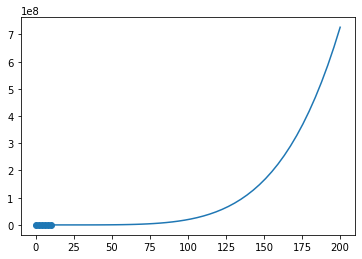

In [31]:
import matplotlib.pyplot as plt

def plot(x, y, ub=0, rng=(0, 200)):
    a = calcular_coeficientes(x, y)
    spc = np.linspace(rng[0], rng[1])
    yy  = v_polinomio(spc, a)

    plt.scatter(x,y)
    plt.plot(spc, yy)

plot(x, y)